<a href="https://colab.research.google.com/github/FrancoGalfrascoli/CSE---437-/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [ ]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -595
Episode 2: total reward = -1189
Episode 3: total reward = -991
Episode 4: total reward = -1288
Episode 5: total reward = -1882


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [5]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

# Functions definition
def epsilon_greedy_action(state, Q, epsilon,  env):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return int(np.argmax(Q[state]))

def greedy_action(state, Q):
    return int(np.argmax(Q[state]))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0


    action = epsilon_greedy_action(state, Q, epsilon,  env)



    for step in range(max_steps):

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])
            break
        else:
            next_action = epsilon_greedy_action(next_state, Q, epsilon,  env)
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action


    print(f"Episode {episode+1}: total reward = {total_reward}")


Episode 1: total reward = -97
Episode 2: total reward = -892
Episode 3: total reward = -397
Episode 4: total reward = -100
Episode 5: total reward = -595
Episode 6: total reward = -298
Episode 7: total reward = -199
Episode 8: total reward = -199
Episode 9: total reward = -298
Episode 10: total reward = -100
Episode 11: total reward = -199
Episode 12: total reward = -199
Episode 13: total reward = -199
Episode 14: total reward = -298
Episode 15: total reward = -100
Episode 16: total reward = -100
Episode 17: total reward = -100
Episode 18: total reward = -100
Episode 19: total reward = -100
Episode 20: total reward = -100
Episode 21: total reward = -298
Episode 22: total reward = -397
Episode 23: total reward = -199
Episode 24: total reward = -199
Episode 25: total reward = -100
Episode 26: total reward = -298
Episode 27: total reward = -199
Episode 28: total reward = -199
Episode 29: total reward = -199
Episode 30: total reward = -63
Episode 31: total reward = -199
Episode 32: total r

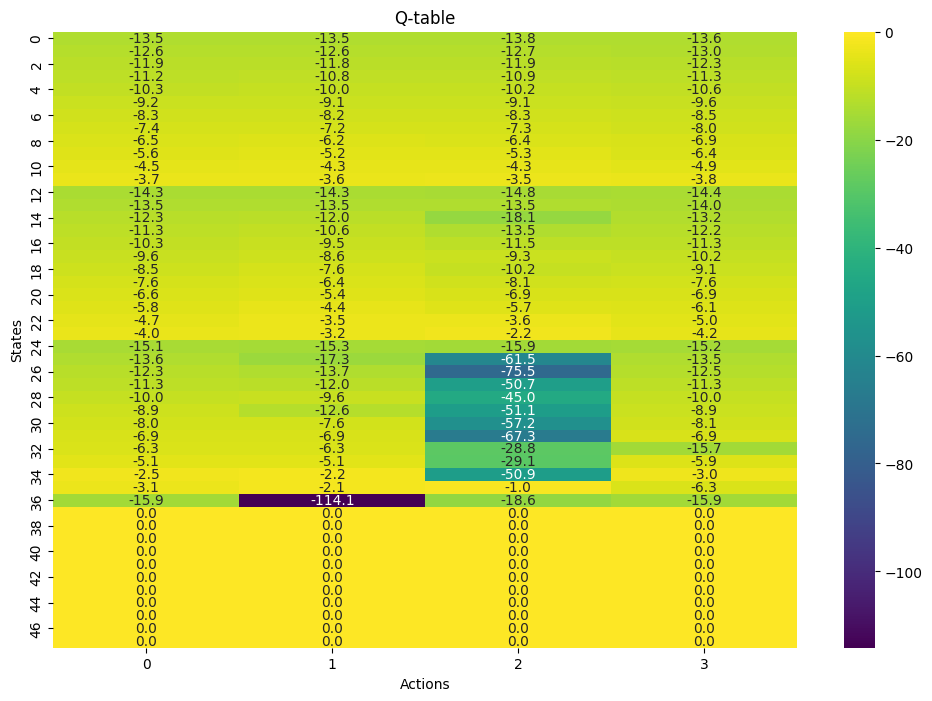

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

In [3]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()
plot_policy(Q)

NameError: name 'plt' is not defined

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

In [ ]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

# Functions definition
def epsilon_greedy_action(state, Q, epsilon,  env):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return int(np.argmax(Q[state]))

def greedy_action(state, Q):
    return int(np.argmax(Q[state]))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    for step in range(max_steps):

        action = epsilon_greedy_action(state, Q, epsilon,  env)

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])

            break
        else:
            next_action = greedy_action(next_state, Q)
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state

    print(f"Episode {episode+1}: total reward = {total_reward}")


Episode 1: total reward = -80
Episode 2: total reward = -199
Episode 3: total reward = -694
Episode 4: total reward = -298
Episode 5: total reward = -397
Episode 6: total reward = -100
Episode 7: total reward = -298
Episode 8: total reward = -199
Episode 9: total reward = -199
Episode 10: total reward = -199
Episode 11: total reward = -199
Episode 12: total reward = -79
Episode 13: total reward = -100
Episode 14: total reward = -298
Episode 15: total reward = -182
Episode 16: total reward = -100
Episode 17: total reward = -199
Episode 18: total reward = -168
Episode 19: total reward = -100
Episode 20: total reward = -199
Episode 21: total reward = -100
Episode 22: total reward = -100
Episode 23: total reward = -100
Episode 24: total reward = -298
Episode 25: total reward = -198
Episode 26: total reward = -84
Episode 27: total reward = -100
Episode 28: total reward = -298
Episode 29: total reward = -135
Episode 30: total reward = -90
Episode 31: total reward = -298
Episode 32: total rew

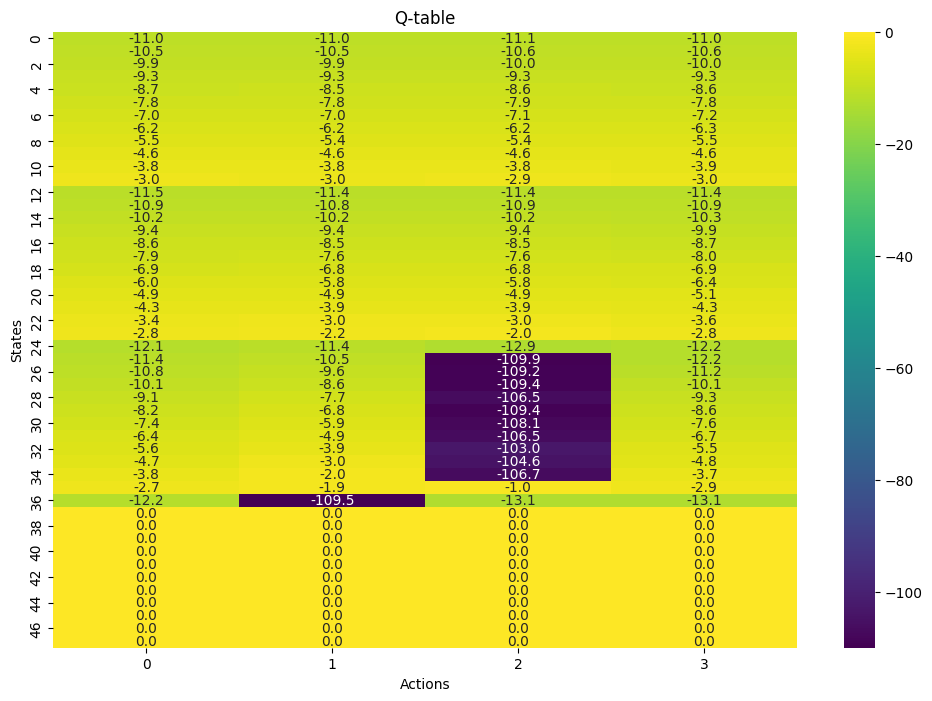

In [ ]:
plot_Q(Q)

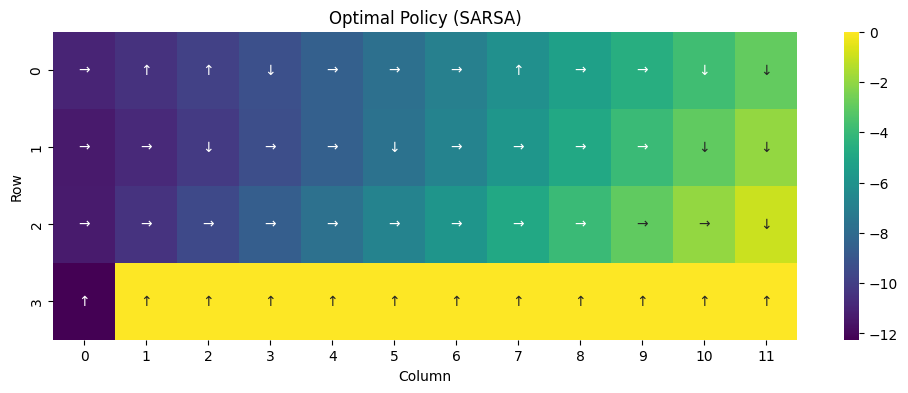

In [ ]:
plot_policy(Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


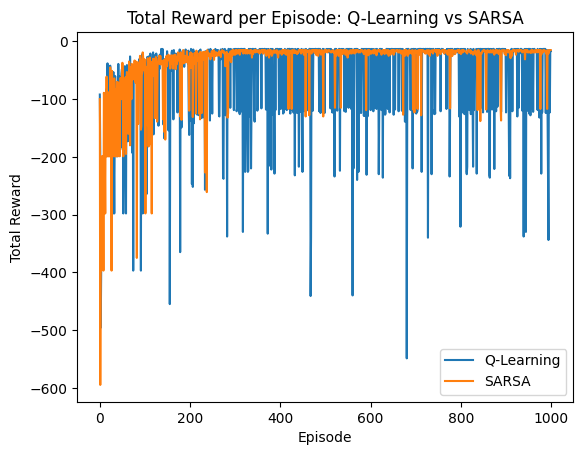

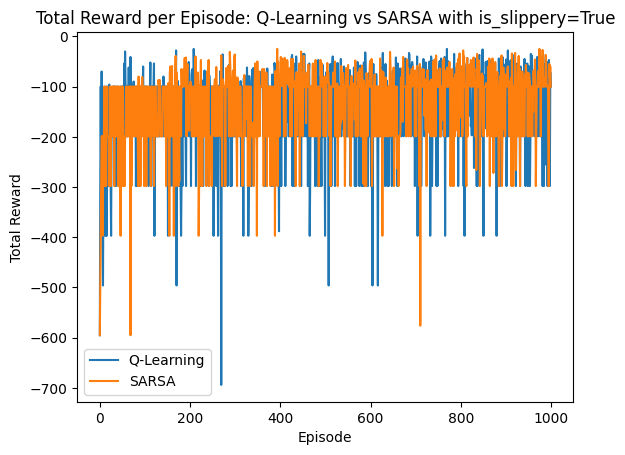

In [ ]:
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1

reward_episodes_SARSA = []
reward_episodes_SARSA_average = np.zeros(n_episodes)
# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])



    for step in range(max_steps):

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])
            break
        else:
            if np.random.rand() < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(Q[next_state])

            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action

    reward_episodes_SARSA.append(total_reward)
    reward_episodes_SARSA_average[episode] += (total_reward - reward_episodes_SARSA_average[episode])/(episode + 1)


# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1

reward_episodes_Q = []
reward_episodes_Q_average = np.zeros(n_episodes)

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    for step in range(max_steps):

        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])

            break
        else:
            next_action = np.argmax(Q[next_state])
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state

    reward_episodes_Q.append(total_reward)
    reward_episodes_Q_average[episode] += (total_reward - reward_episodes_Q_average[episode])/(episode + 1)

plt.plot(reward_episodes_Q, label="Q-Learning")
# plt.plot(reward_episodes_Q_average, label="Q-Learning Average", linestyle='--')

plt.plot(reward_episodes_SARSA, label="SARSA")
# plt.plot(reward_episodes_SARSA_average, label="SARSA Average", linestyle='--')

plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode: Q-Learning vs SARSA")
plt.legend()

# Create the environment
env = gym.make("CliffWalking-v1", is_slippery=True, render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1
reward_episodes_SARSA_slippery = []

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])



    for step in range(max_steps):

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])
            break
        else:
            if np.random.rand() < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(Q[next_state])

            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action

    reward_episodes_SARSA_slippery.append(total_reward)



# Create the environment
env = gym.make("CliffWalking-v1", is_slippery=True, render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1

reward_episodes_Q_slippery = []
# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    for step in range(max_steps):

        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])

            break
        else:
            next_action = np.argmax(Q[next_state])
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state

    reward_episodes_Q_slippery.append(total_reward)


plt.figure()
plt.plot(reward_episodes_Q_slippery, label="Q-Learning")
plt.plot(reward_episodes_SARSA_slippery, label="SARSA")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode: Q-Learning vs SARSA with is_slippery=True")
plt.legend()


1. From the first plot, I can see that Q-Learning shows more variability, obtaining rewards smaller than '-200' much more often than the SARSA algorithm. However, both algorithms converge to a similar final value.

2. After setting is_slippery=True, both algorithms seem to perform similarly. Based on the plot, it is difficult to determine if one consistently outperforms the other.

# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?


In [ ]:
!pip install gym_simplegrid

In [ ]:
import gymnasium as gym
import gym_simplegrid

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='ansi')
obs, info = env.reset(options=options)
done = env.unwrapped.done

n_episodes = 1000    # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.9
reward_episodes_SARSA = []

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


for episode in range(n_episodes):
    state, info = env.reset(options=options)
    terminated = False
    truncated = False
    total_reward = 0

    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])



    for step in range(max_steps):

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])
            break
        else:
            if np.random.rand() < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(Q[next_state])

            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action

    reward_episodes_SARSA.append(total_reward)



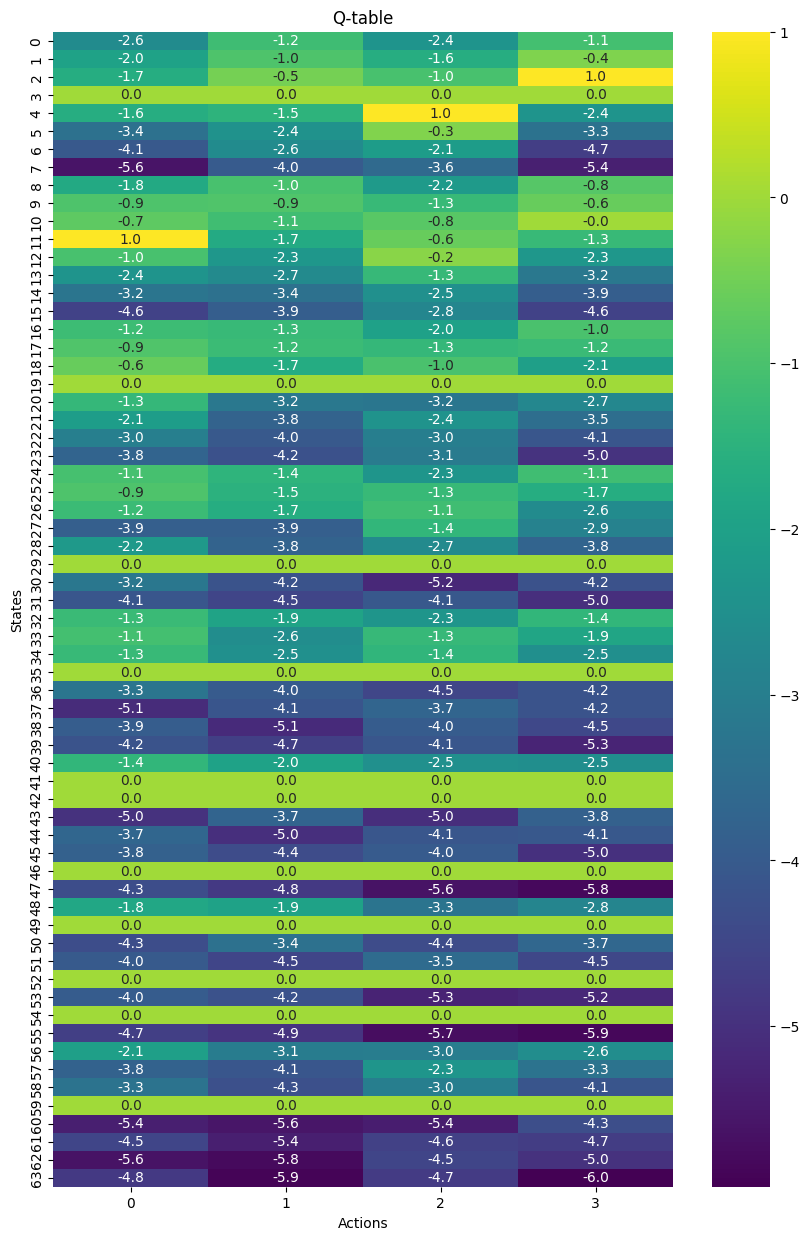

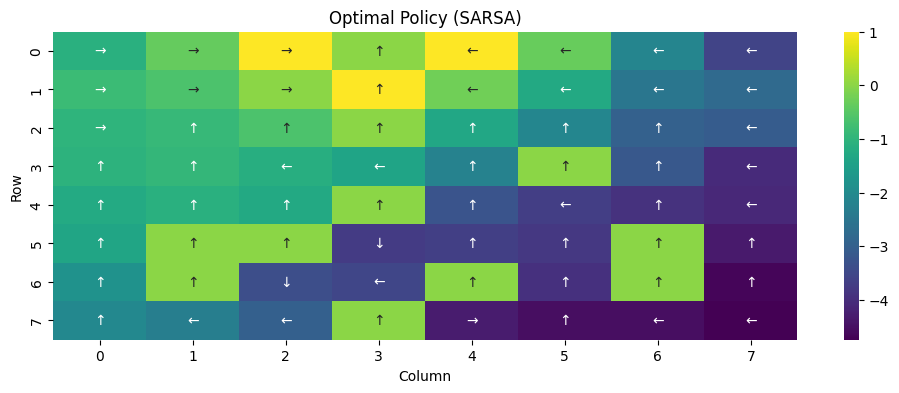

In [ ]:
def plot_Q(Q):
  plt.figure(figsize=(10, 15))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((8, 8, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: down, 2: left, 3: right)
  action_arrows = {0: "↑", 1: "↓", 2: "←", 3: "→"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()


plot_policy(Q, "SARSA")

I noticed that the policy learnt in this 1000 episodes is really sensitive to the value of epsilon used. If the epsilon is small (around 0.1), then the optimal trajectory is learn in around 20 episodes, but most of the space remains unexplored. When the epsilon is bigger (around 0.9), most of the space is explored but takes more episodes.